# Project: Classification - Loan Eligibility Prediction

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context:
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses.

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan.

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands)
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## Importing necessary libraries and overview of the dataset - Add libraries as needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [ ]:
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


## Printing the info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


Observation:

* There are 614 observations and 12 columns.

* All the columns have 614 non-null values i.e. there are no missing values in the data.

## Unique Values

In [ ]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Observations:

* Loan_ID is an identifier which is unique for each employee and we can drop this column as it would not add any value to our analysis.

* All other columns have atleast 2 unique values so we do not need to drop any more.

* On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

## Dropping the identifier

In [ ]:
data=data.drop(['Loan_ID'],axis=1)

## Creating numerical and categorical columns

In [ ]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']

cat_cols= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

## Univariate Analysis

Univariate analysis for numerical data

In [ ]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


Observations:

* The average income of the applicants is over 5,400. Applicant incomes range between 150 and go upto and a little over 81,000

* The average income of the coapplicants is over 1,600. The highest coapplicant income goes upto and over $41,000 but sometimes the coapplicants do not have a source of income.

* The average loan amount of the applicants is 141. There are records of applicants who do not have any loan as well.

* The average loan amount term is 342

* The average credit score of the applicants is 0.84. There are also a few records where the applicants have a full credit score.

* Neraly 69% of the applicants got their loan approved

Analysing distributions by generating histograms

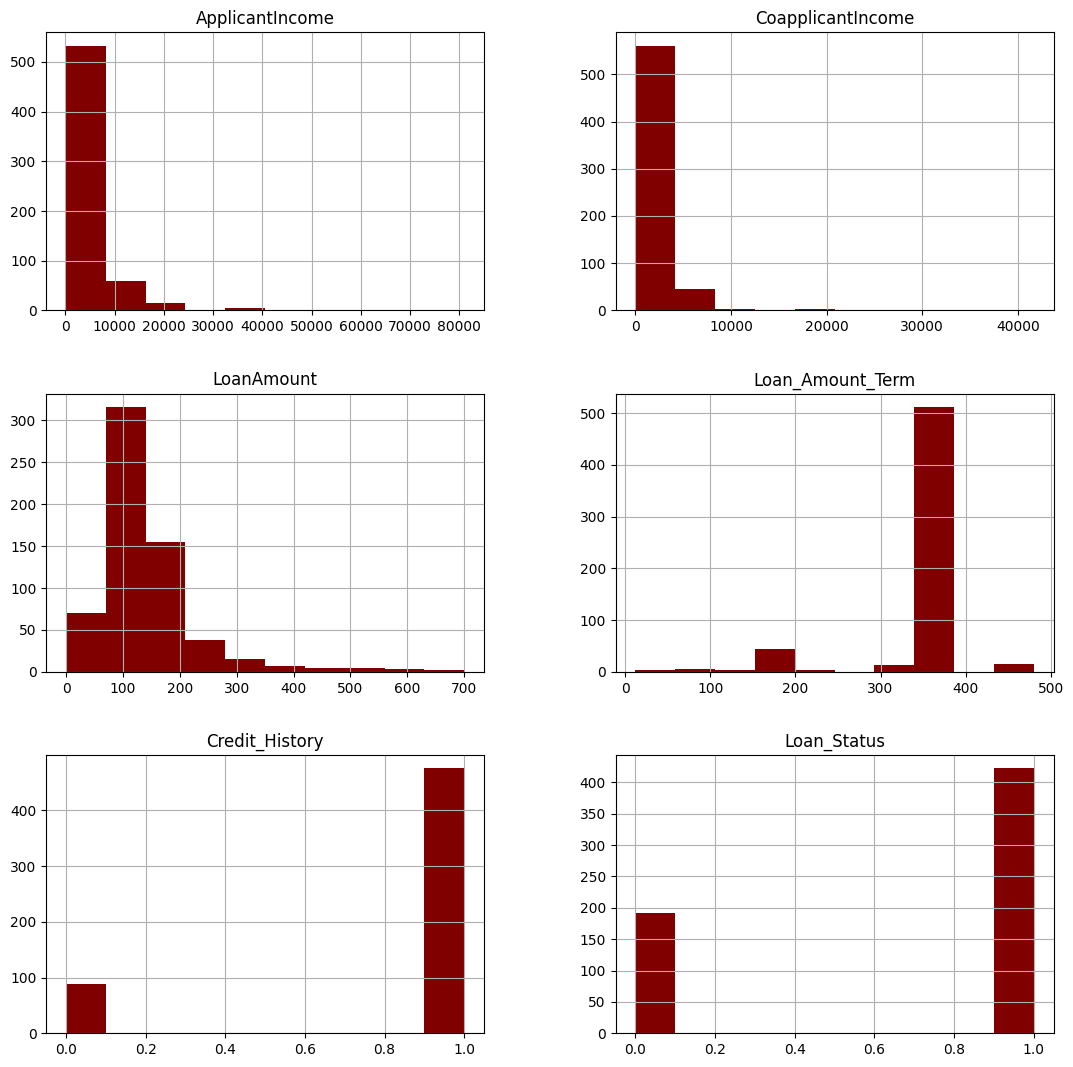

In [ ]:
data[num_cols].hist(figsize=(13,13), color='maroon')
plt.show()

Observations:
* Most applicants have an income that is less than 10,000

* Most coapplicants have an income that is less than 5,000

* The loan amount distribution is close to a right skewed distribution with the  peak being over 100.

* Most of the applicants have a term greater than 300.

* The majority of the applicants have a good credit history.

* The number of applicants approved for the loan is greater than the ones that haven't been approved

Univariate analysis for categorical data

In [ ]:
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
****************************************
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
****************************************
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
****************************************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
****************************************
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
****************************************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
****************************************


Observations:

* 82% of the applicants are male and 18% are females

* 66% of the applicants are married

* 57% of the applicants have filed no dependants, 17% have filed for 1 dependant, 16% have filed for 2 dependants and 8% of the have filed for 3 or more than 3 dependants

* 78% of the applicants have graduated/ have an academic background.

* 14% of the applicants are self-employed

* 32% of the applicants are from the urban areas, 37% are from semi-urban and 29% are from rural areas.

## Bivariate and Multivariate Analysis

Analyzing the relation of 'Loan-Status' with other categorical variables

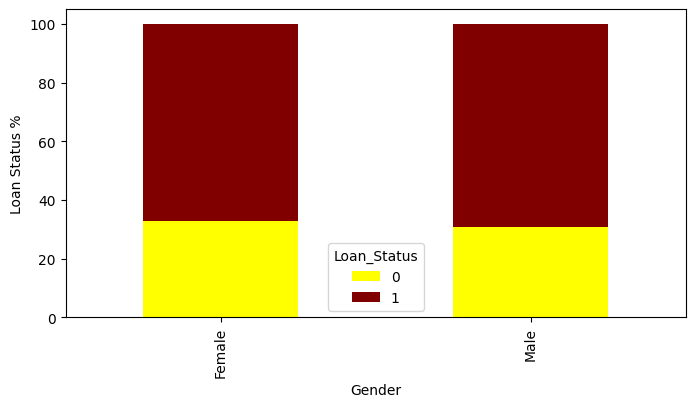

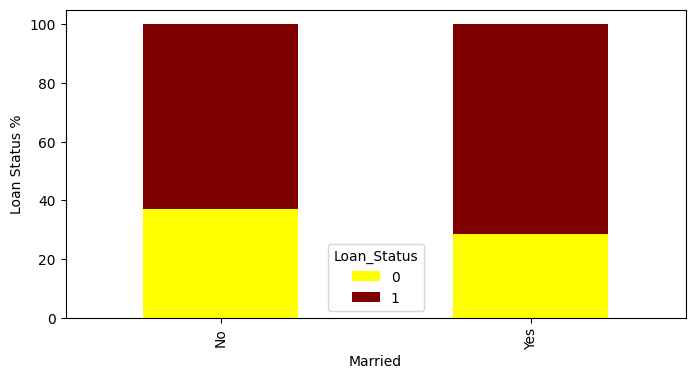

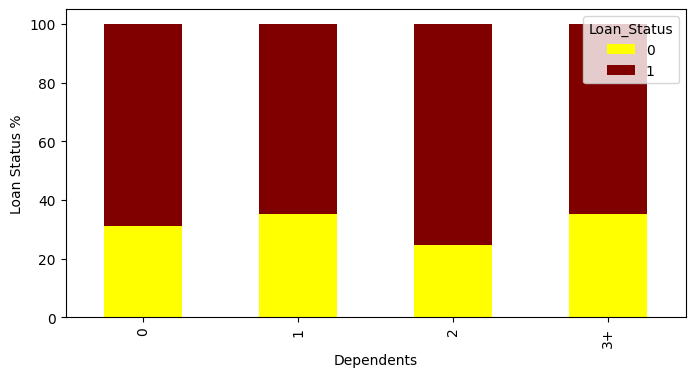

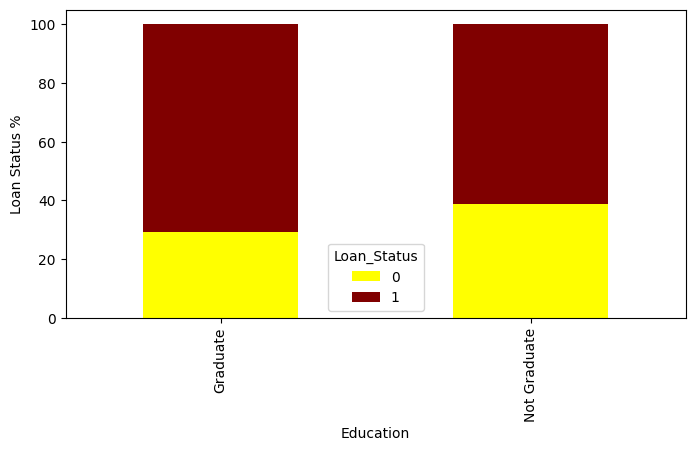

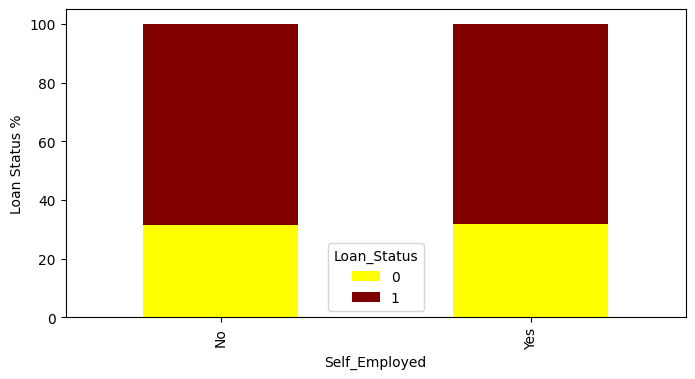

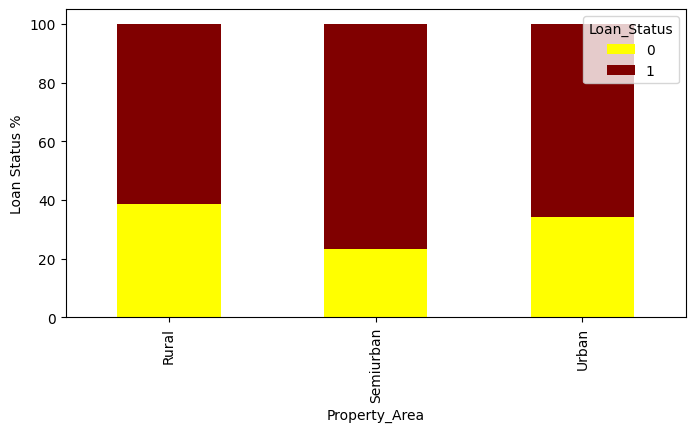

In [ ]:
for i in cat_cols:
    if i!='Loan_Status':
        (pd.crosstab(data[i],data['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True,color=['yellow','maroon'])
        plt.ylabel('Loan Status %')

Observations:

* The approval of loan does not seem to have much of a difference with respect to gender, or the type of employement.

* When it comes to educational background, applicants with a graduation had a higher loan approval rate than the ones who do not have a degree.

* Married applicants seemed to have a higher loan approval rate

* The loan approval rate does not have too much of a difference with respect to the number of filed dependants as well but it seems to be slighlty higher for the ones that had filed 2 dependants compared to the ones that have filed for 0, 1, 3, or 3+

* Applicants from Urband and Semi-urban areas also seemed to have a higher loan approval rate than the ones living in rural areas.

Analyzing the relation of 'Loan-Status' with other numerical variables

In [ ]:
data.groupby(['Loan_Status'])[num_cols].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Loan_Status,,,,,,
0,5446.078125,1877.807292,142.557292,344.064516,0.541899,0.0
1,5384.068720,1504.516398,140.533175,341.072464,0.981818,1.0


Observations:

* The loan approval status does not seem to be having too much of an impact with respect to the applicants income, loan amounts or terms because the averages for the ones that have been approved and the ones that haven't aren't that far off from each other

* The variable that seems to be playing a vital role in the decision appears to be the credit history. Applicants with a stronger credit history appear to have gotten their loan approved way more than the ones with weaker credit history

Relation between different numerical variables

<Axes: >

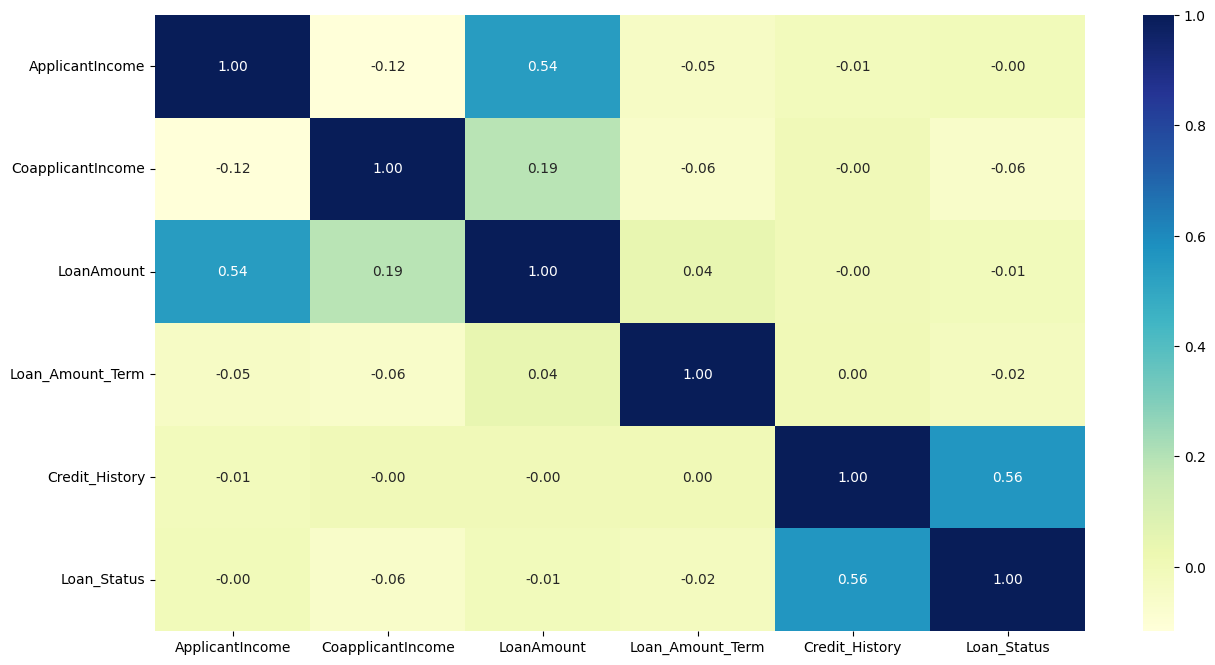

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

Observations:

* ApplicantIncome and LoanAmount & Credit_History and Loan_Status appear to be highly correlated with each other.

* This makes perfect sense because applicants with higher income get a higher loan amount approved and as we have seen in the analysis of Loan_Status with other variables, Credit_History has a great impact on the decision

# Model evaluation criterion
The model can make two types of wrong predictions:
* Predicting an applicant’s loan will get approved even when it would not get approved
* Predicting an applicant’s loan will not get approved when it would get approved

Which case is more important?
* Predicting an applicant’s loan will not get approved when it would get approved i.e. losing out on customers. This would be considered a major miss for any loan approval predictor, and is hence the more important case of wrong predictions.

How to reduce this loss i.e the need to reduce False Negatives?
* The company would want the Recall to be maximized, the greater the Recall, the higher the chances of minimizing false negatives. The model accuracy should also be as high as possible. Hence, the focus should be on improving accuracy and  increasing Recall (minimizing the false negatives) or in other words identifying the true positives (i.e. Class 1) very well, so that the company can approve the loans effectively especially for applicants with good credit history. This would help in optimizing the approval process by providing loans to the most eligible applicants.

# Model Building - Approach
1. Prepare data for modeling
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Preparing data for modeling

Creating dummy variables for categorical variables

In [ ]:
to_get_dummies_for = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

data = pd.get_dummies(data = data, columns= to_get_dummies_for, drop_first= True)

Seperating the independent variables (X) and dependent variable (Y)

In [ ]:
Y= data.Loan_Status
X= data.drop(columns = ['Loan_Status'])

Scaling the data

In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

Splitting the data into 70% train and 30% test set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1,stratify=Y)

### Importing necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#for tuning the model
from sklearn.model_selection import GridSearchCV

### Creating function to calculate and print the classification report and confusion matrix

We will attempt to predict the applicants' status loan of approval/disapproval.

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Building the models

We will be building 5 models:

* Tree Induction
* Logistic Regression
* Linear Discrimnate Analysis
* Quadratic Disriminate Analysis
* Random Forest Classifier

## Tree Induction

In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 8
dt = DecisionTreeClassifier(max_depth=8, random_state=42)

### Checking for NaN Values

Before model training, we will perform a check for NaN values in both the feature (x_train) and target (y_train) sets.

In [ ]:
import numpy as np

print(np.isnan(x_train).any())
print(np.isnan(y_train).any())

ApplicantIncome            False
CoapplicantIncome          False
LoanAmount                 False
Loan_Amount_Term            True
Credit_History              True
Gender_Male                False
Married_Yes                False
Dependents_1               False
Dependents_2               False
Dependents_3+              False
Education_Not Graduate     False
Self_Employed_Yes          False
Property_Area_Semiurban    False
Property_Area_Urban        False
dtype: bool
False


The results indicated missing values in Loan_Amount_Term and Credit_History.

Handling NaN values using SimpleImputer:

To address missing values, we will use the SimpleImputer from scikit-learn, opting for the mean strategy. The imputer was fitted and transformed on the training data (x_train) to replace NaN values.

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' as well

# Fit and transform the imputer on your data
x_train_imputed = imputer.fit_transform(x_train)

We then fit the DecisionTreeClassifier (dt) to the imputed training data, and predictions were made on the imputed test data.

In [ ]:
dt.fit(x_train_imputed, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

Performing imputing for the test set as well to avoid NaN values

In [ ]:
x_test_imputed = imputer.transform(x_test)

In [ ]:
y_pred = dt.predict(x_test_imputed)
y_pred[:6]

array([1, 1, 1, 1, 1, 1])

### Checking Model Performance

To evaluate the model's performance, we compared the predictions against both the training and test sets. The metrics_score function was employed to assess metrics such as accuracy, recall, and precision.

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       134
           1       0.89      0.96      0.93       295

    accuracy                           0.89       429
   macro avg       0.90      0.85      0.87       429
weighted avg       0.89      0.89      0.89       429



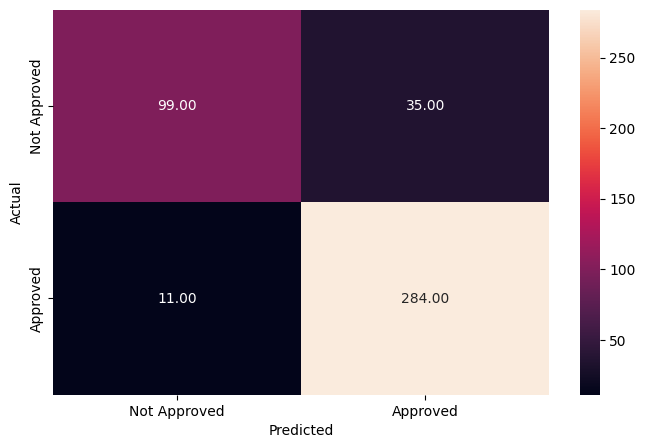

In [ ]:
#checking model performace of dt
y_pred_train_dt = dt.predict(x_train_imputed)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

           0       0.59      0.50      0.54        58
           1       0.79      0.84      0.81       127

    accuracy                           0.74       185
   macro avg       0.69      0.67      0.68       185
weighted avg       0.73      0.74      0.73       185



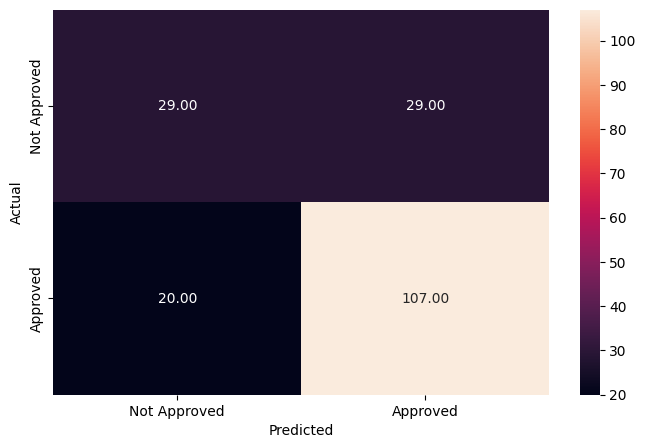

In [ ]:
#checking model performace of dt
y_pred_test_dt = dt.predict(x_test_imputed)
metrics_score(y_test, y_pred_test_dt)

Model Performance Summary:

The evaluation of our model involves looking at key metrics that help us understand how well it's doing.

Understanding the Confusion Matrix:

* True Negative (TN): The model correctly predicts cases where applicants shouldn't get a loan, and indeed, they don't.
* False Positive (FP): The model predicts loan approval, but the application is denied.
* False Negative (FN): The model predicts loan denial, but the applicant is approved.
* True Positive (TP): The model correctly predicts cases where applicants should get a loan, and indeed, they do.

Observations:

* Overall Accuracy:
Our model is generally correct in its predictions.

* Recall for Loan Approval (Class 1):
This is crucial. The model seems to miss out on identifying some cases where applicants should be approved for a loan.

* Precision:
The model might say "approved" for some applicants who shouldn't be. It's not super precise.

Other Things to Check:

* Class Imbalance: We need to check if there are more cases of approved or denied loans. This could affect how well the model works.

* Adjusting the Model: We might want to tweak the model a bit to make sure it's catching more of the right cases.

Conclusion:

While our model is doing okay, there's room for improvement. We want it to be better at identifying who should get a loan and be more certain in its predictions. This would help us make smarter decisions and avoid unnecessary complications.

### Feature importance

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': dt.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
4,Credit_History,0.452183
2,LoanAmount,0.186474
0,ApplicantIncome,0.147972
1,CoapplicantIncome,0.093550
5,Gender_Male,0.020213
3,Loan_Amount_Term,0.019222
7,Dependents_1,0.018142
12,Property_Area_Semiurban,0.015277
11,Self_Employed_Yes,0.015057
13,Property_Area_Urban,0.014723


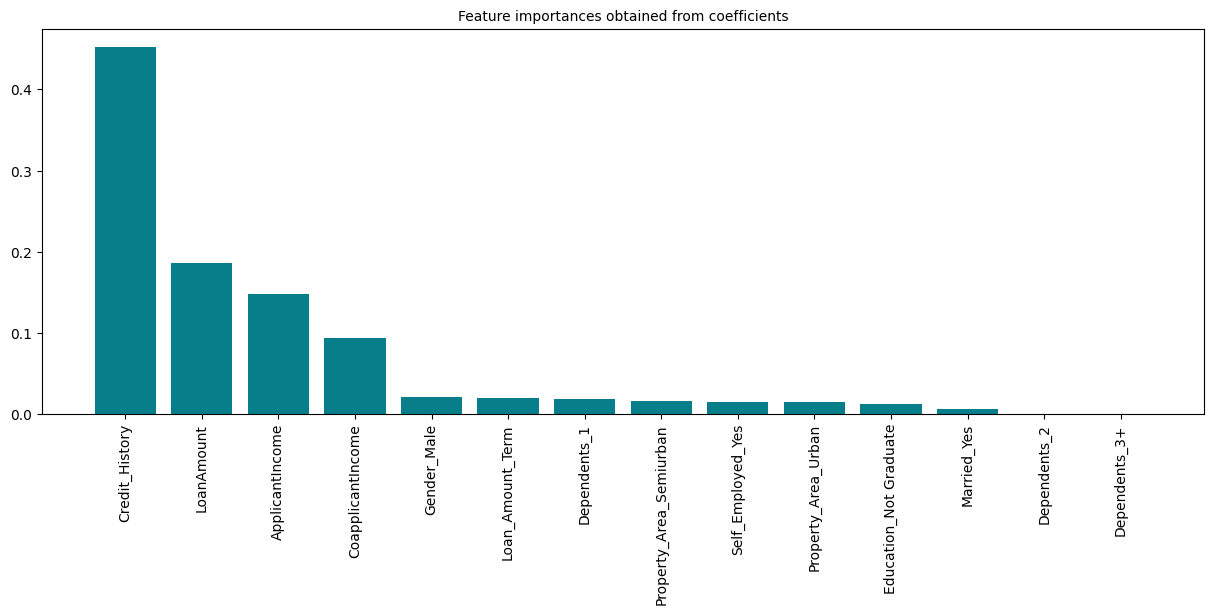

In [ ]:
#define figure size in (width, height) for a single plot
plt.figure(figsize=(15,5))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

Feature Importance Breakdown:
We took a close look at our loan approval model to figure out which factors weigh the most in deciding whether the loan gets approved or disapproved

Recommendations:
1. ***The Credit Score of an applicant is given the utmost importance, i.e., 45.2%***, so while picking the customers you want to represent the credit score should be given the highest weightage when compared to the other factors. Also, it does not imply a bad credit score leads to rejection of a loan as their are other factors to consider.

2. The amount of money someone asks for in a ***loan also matters(18.6%)***. We need to be careful about how much people are asking for, as it has a decent impact on the approval decision.

3. The ***Applicant and Coapplicant Income (14.8% and 9.4%)*** have impact on the approval decision. How much money someone makes is crucial. Both the person applying for the loan and anyone else supporting them financially (coapplicant) play a big role in the decision.

4. ***All the other factors have an identical importance*** and are not that emphasized, these factors need not be taken into consideration.

5. ***The number of dependents doesn't matter once it is equal to or greater than 2***. We can remove this columns in our inquiry forms which would minimize the data the model has to go through in order to classify the data. We can replace this with just requiring the applicant to mention whether they have a dependant(s) or not.


## Logistic Regression

In [ ]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(x_train_imputed,y_train)

LogisticRegression()

Checking model performance

              precision    recall  f1-score   support

           0       0.88      0.45      0.59       134
           1       0.80      0.97      0.87       295

    accuracy                           0.81       429
   macro avg       0.84      0.71      0.73       429
weighted avg       0.82      0.81      0.79       429



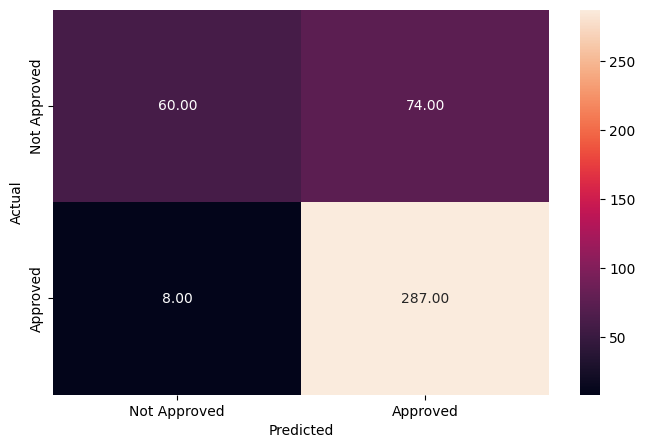

In [ ]:
#checking the performance on the training data
y_pred_train = lg.predict(x_train_imputed)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        58
           1       0.79      1.00      0.89       127

    accuracy                           0.82       185
   macro avg       0.90      0.72      0.74       185
weighted avg       0.86      0.82      0.80       185



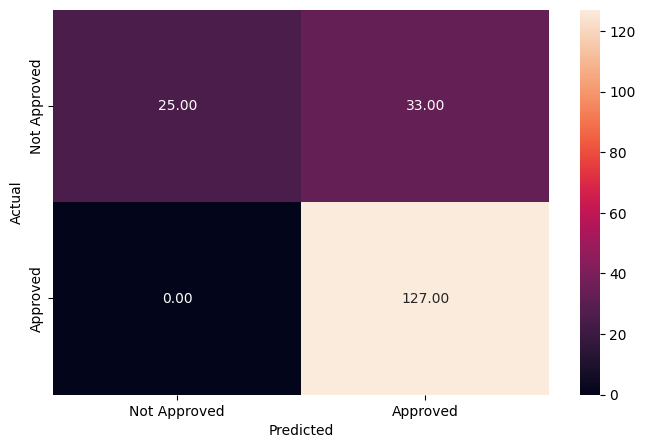

In [ ]:
#checking the performance on the test dataset
y_pred_test = lg.predict(x_test_imputed)
metrics_score(y_test, y_pred_test)

**Observations:**

Training Set Insights:

* The model performs well in identifying class 1 instances with high precision and recall.
* However, for class 0, precision is good but the recall is relatively lower, indicating difficulty in correctly identifying these instances.
* The overall accuracy on the training set is 81%.

Test Set Insights:

* Similar to the training set, the model demonstrates excellent precision for class 1 and struggles with recall for class 0.
* It exhibits perfect precision but lower recall for class 0, implying a challenge in identifying all the instances of this class.
* The overall accuracy on the test set is 82%.

Overall Observation:

* The model's strong suit lies in accurately predicting class 1 instances but faces challenges in correctly identifying class 0 instances.
* The precision and recall disparities between the classes suggest a potential class imbalance issue affecting model performance.

Printing the coefficients

In [ ]:
#printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Credit_History,1.263054
Property_Area_Semiurban,0.535384
Married_Yes,0.242147
Property_Area_Urban,0.151915
Dependents_2,0.130171
ApplicantIncome,0.033552
Gender_Male,-0.021557
LoanAmount,-0.059120
Dependents_3+,-0.081136
Self_Employed_Yes,-0.094654


**Observations:**

Feature Impact on Loan Approval (Coefficients):

Positive Impact (Higher Odds):

* Credit_History (Coefficient: 1.263054): Significantly influences loan approval odds, suggesting that having a good credit history strongly increases the chances of loan approval.

* Property_Area_Semiurban (Coefficient: 0.535384): Positively impacts loan approval odds, indicating that applicants from semiurban areas have higher chances of approval.

* Married_Yes (Coefficient: 0.242147): Being married shows a positive effect on loan approval odds.

* Property_Area_Urban (Coefficient: 0.151915): Urban property areas have a relatively lower positive impact on loan approval odds compared to semiurban areas but still contribute positively.

* Dependents_2 (Coefficient: 0.130171): Having two dependents also shows a positive effect on loan approval odds.

Negative Impact (Lower Odds):

* Dependents_1 (Coefficient: -0.136942): Having just one dependent negatively influences loan approval odds.

* Loan_Amount_Term (Coefficient: -0.132091): Longer loan terms negatively impact the odds of loan approval.

* Education_Not Graduate (Coefficient: -0.126780): Not being a graduate has a negative effect on loan approval odds.

* CoapplicantIncome (Coefficient: -0.116290): Higher co-applicant income seems to have a negative impact on loan approval odds.

* Self_Employed_Yes (Coefficient: -0.094654): Being self-employed shows a negative effect on loan approval odds.

* Dependents_3+ (Coefficient: -0.081136): Having three or more dependents negatively influences loan approval odds.

* LoanAmount (Coefficient: -0.059120): Larger loan amounts have a negative effect on loan approval odds.

* Gender_Male (Coefficient: -0.021557): Being male slightly decreases the odds of loan approval.

* ApplicantIncome (Coefficient: 0.033552): Applicant income shows a minimal positive effect on loan approval odds.

Overall Observation:

* Features like credit history, property area (especially semiurban), and marital status significantly influence higher odds of loan approval.
* On the contrary, factors like number of dependents, loan amount terms, educational background, and being self-employed negatively impact the odds of loan approval.

Finding the odds

In [ ]:
odds = np.exp(lg.coef_[0])

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, x_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
Credit_History,3.536206
Property_Area_Semiurban,1.708104
Married_Yes,1.273981
Property_Area_Urban,1.164061
Dependents_2,1.139024
ApplicantIncome,1.034121
Gender_Male,0.978673
LoanAmount,0.942593
Dependents_3+,0.922068
Self_Employed_Yes,0.909687


**Observations:**

Loan Approval Odds Impact (Exponential of Coefficients):

Positive Impact (Higher Odds):

* Credit_History (Odds: 3.536206): Having a good credit history significantly boosts the odds of loan approval.

* Property_Area_Semiurban (Odds: 1.708104): Applicants from semiurban areas have higher odds of loan approval compared to other areas.

* Married_Yes (Odds: 1.273981): Being married positively impacts the odds of loan approval.

* Property_Area_Urban (Odds: 1.164061): Urban property areas also contribute positively but with slightly lower odds compared to semiurban areas.

* Dependents_2 (Odds: 1.139024): Having two dependents positively affects the odds of loan approval.

Negative Impact (Lower Odds):

* Dependents_1 (Odds: 0.872021): Having just one dependent lowers the odds of loan approval.

* Loan_Amount_Term (Odds: 0.876261): Longer loan terms reduce the odds of loan approval.

* Education_Not Graduate (Odds: 0.880928): Not being a graduate negatively impacts the odds of loan approval.

* CoapplicantIncome (Odds: 0.890217): Higher co-applicant income seems to lower the odds of loan approval.

* Self_Employed_Yes (Odds: 0.909687): Being self-employed has a negative effect on the odds of loan approval.

* Dependents_3+ (Odds: 0.922068): Having three or more dependents reduces the odds of loan approval.

* LoanAmount (Odds: 0.942593): Larger loan amounts have slightly lower odds of approval.

* Gender_Male (Odds: 0.978673): Being male slightly reduces the odds of loan approval.

* ApplicantIncome (Odds: 1.034121): Applicant income shows a minimal positive effect on loan approval odds.

Overall Observation:

* The odds derived from the exponential of coefficients reaffirm the impact of certain factors on loan approval.
* Strong predictors like credit history, property area (especially semiurban), and marital status significantly increase the odds of loan approval.
* Conversely, factors like the number of dependents, loan amount terms, educational background, and being self-employed have a negative influence on loan approval odds.

Precission recall curve

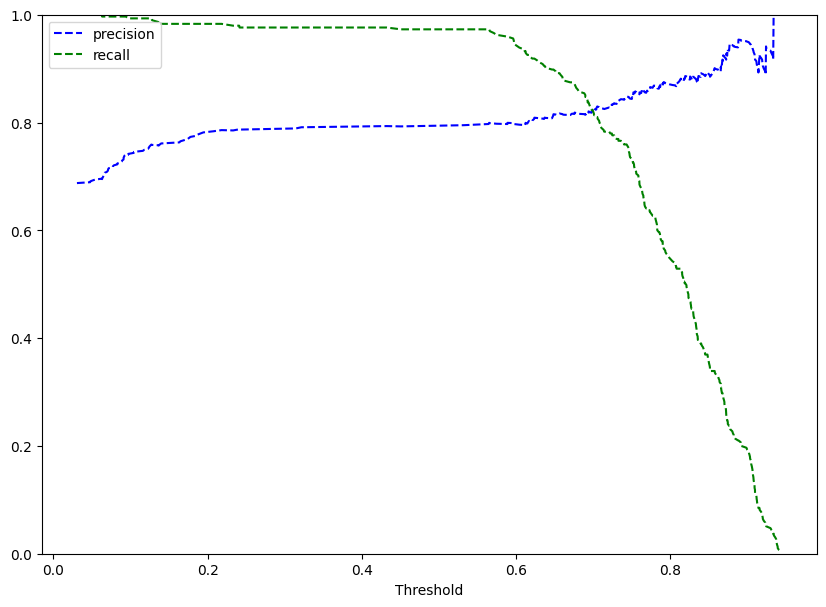

In [ ]:
y_scores_lg=lg.predict_proba(x_train_imputed) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.75**.

**Let's find out the performance of the model at this threshold**

Performance of model at this threshold

              precision    recall  f1-score   support

           0       0.54      0.70      0.61       134
           1       0.84      0.73      0.78       295

    accuracy                           0.72       429
   macro avg       0.69      0.72      0.70       429
weighted avg       0.75      0.72      0.73       429



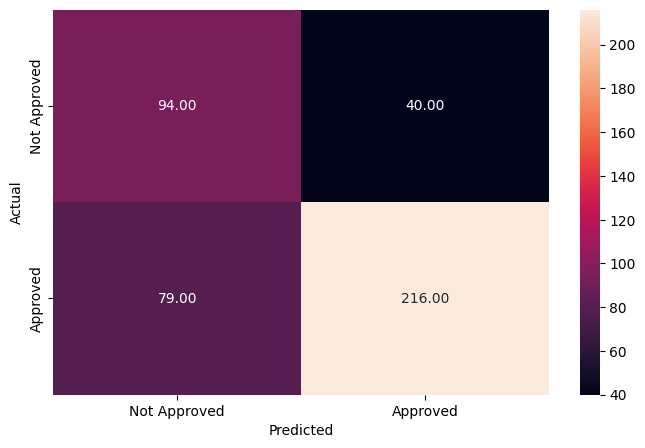

In [ ]:
optimal_threshold1=.75
y_pred_train = lg.predict_proba(x_train_imputed)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.46      0.66      0.54        58
           1       0.80      0.65      0.72       127

    accuracy                           0.65       185
   macro avg       0.63      0.65      0.63       185
weighted avg       0.70      0.65      0.66       185



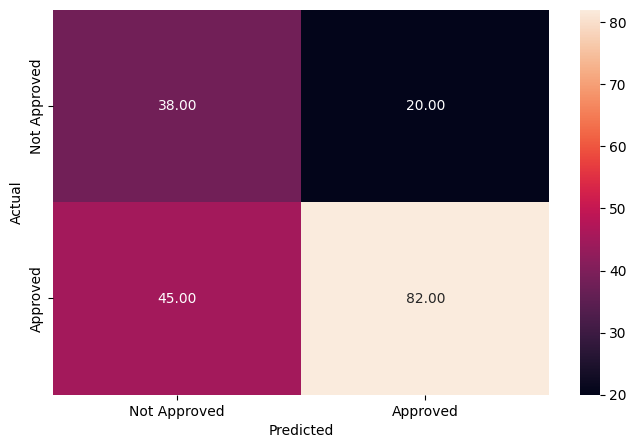

In [ ]:
optimal_threshold1=.75
y_pred_test = lg.predict_proba(x_test_imputed)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:**

Model Performance at the Balanced Threshold:

Training Set:

* Precision-Recall at Threshold 0.75:
* Precision for class 0: 0.54 and recall: 0.70.
* Precision for class 1: 0.84 and recall: 0.73.
* Accuracy: 72%

Test Set:

* Precision-Recall at Threshold 0.75:
* Precision for class 0: 0.46 and recall: 0.66.
* Precision for class 1: 0.80 and recall: 0.65.
* Accuracy: 65%

Overall Observation:

* At this threshold, the model maintains a higher precision for class 1 but shows a relatively lower precision for class 0.
* Though precision is higher for class 1, the recall for both classes is more balanced compared to other thresholds, indicating better coverage across both classes.
* The accuracy of the model decreases compared to previous thresholds, indicating a potential trade-off between precision, recall, and overall accuracy.

Finally, we have decided not to take the threshold into considerations since the accuracy has been negatively impacted compared to the original results.

### Linear Discriminant Analysis

In [ ]:
#fitting lda model
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_imputed, y_train)

LinearDiscriminantAnalysis()

Checking model performance

              precision    recall  f1-score   support

           0       0.89      0.44      0.59       134
           1       0.79      0.98      0.88       295

    accuracy                           0.81       429
   macro avg       0.84      0.71      0.73       429
weighted avg       0.82      0.81      0.79       429



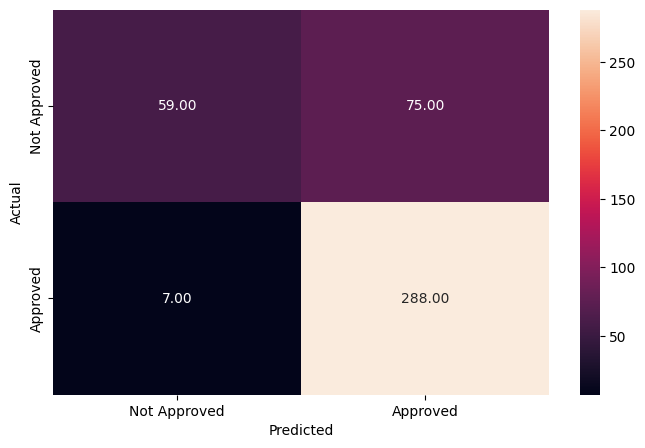

In [ ]:
#checking model performace of lda
y_pred_train_lda = lda.predict(x_train_imputed)
metrics_score(y_train, y_pred_train_lda)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        58
           1       0.79      1.00      0.89       127

    accuracy                           0.82       185
   macro avg       0.90      0.72      0.74       185
weighted avg       0.86      0.82      0.80       185



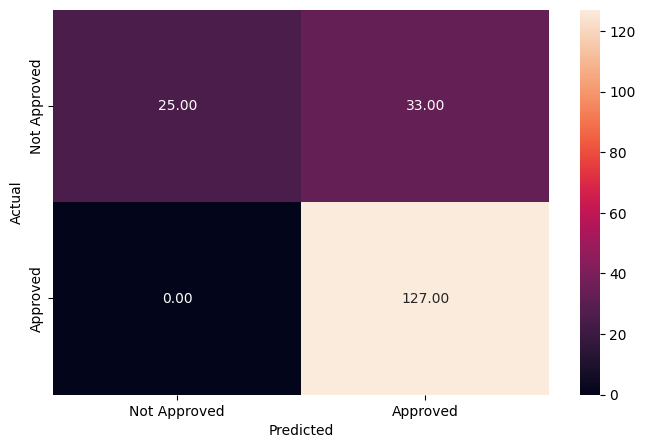

In [ ]:
y_test_pred = lda.predict(x_test_imputed)
metrics_score(y_test, y_test_pred)

Confusion Matrix Analysis (Interpreted from Recall and Precision):

For Loan Approval:

* True Negative (Actual Rejected Loan, Predicted Rejected Loan): The model correctly identifies instances where loans should be rejected (True Negative). This aligns with the high precision for rejected loans (Class 0, precision: 89%).

* False Positive (Actual Rejected Loan, Predicted Approved Loan): The model misclassifies some instances as approved loans when they should have been rejected (False Positive). This is indicated by the lower recall for rejected loans (Class 0, recall: 44%).

* False Negative (Actual Approved Loan, Predicted Rejected Loan): The model fails to identify some instances that should have been approved but were classified as rejected (False Negative). This could be inferred from the lower recall for rejected loans (Class 0, recall: 44%).

* True Positive (Actual Approved Loan, Predicted Approved Loan): The model correctly identifies instances where loans should be approved (True Positive). This aligns with the high recall for approved loans (Class 1, recall: 98%).


Observations from Confusion Matrix Interpretation:

* Model's Strength in Identifying Approved Loans (Class 1): The model effectively identifies instances where loans should be approved (high recall and precision for Class 1).

* Challenges in Predicting Rejected Loans (Class 0): The model struggles to accurately identify instances where loans should be rejected (low recall for Class 0). This is evident from the misclassification of some rejected loan instances as approved loans (False Positive).

Impact on Decision Making:

* False negatives (instances wrongly classified as rejected loans) might lead to missed opportunities where loans should have been approved, potentially affecting the lender's profitability or customer satisfaction.
Precision-Recall Trade-off:

* The model's higher precision for rejected loans (Class 0) indicates a higher certainty when predicting rejections, but at the expense of missing a considerable number of actual rejected instances (lower recall).
In summary, the confusion matrix interpretation emphasizes the model's struggle in accurately identifying instances for loan rejection, leading to potential missed opportunities for approved loans and highlighting the need for improvements in classifying rejected loan applications.

Checking the coefficients

In [ ]:
#creating list of column names
cols=X.columns

#saving coefficients of lda model
coef_lda=lda.coef_

#printing the cofficients of lda
pd.DataFrame(coef_lda,columns=cols).T.sort_values(by=0,ascending=False)

,0
Credit_History,1.658833
Property_Area_Semiurban,0.563428
Married_Yes,0.259977
Property_Area_Urban,0.195959
Dependents_2,0.107344
ApplicantIncome,0.039548
Gender_Male,-0.010737
LoanAmount,-0.073332
Dependents_3+,-0.087849
Self_Employed_Yes,-0.088989


**Observations:**

Feature Importance:

Some features which positively affect the Loan Approval are:

* Credit History: It is the most impactful factor, greatly influencing loan approval.
* Semiurban Property Area: Living in this area positively affects the chances of loan approval.
* Married Status: Being married shows a positive impact on loan approval.

Some features which negatively affect the Loan Approval are:

* Coapplicant Income: Higher coapplicant income seems to have a negative impact on loan approval.
* Dependents (3+): Having three or more dependents might decrease the chances of loan approval.

Observations:
* Key Positive Influencers: Having a good credit history significantly boosts loan approval chances, followed by living in a semiurban area and marital status.
* Potential Negative Factors: Higher coapplicant income and having three or more dependents could hinder the chances of loan approval.
* Focus Areas: Maintaining a positive credit history and considering the applicant's location might notably improve loan approval rates. Managing coapplicant income and the number of dependents could also impact approval prospects.

Precision-Recall Curve for LDA

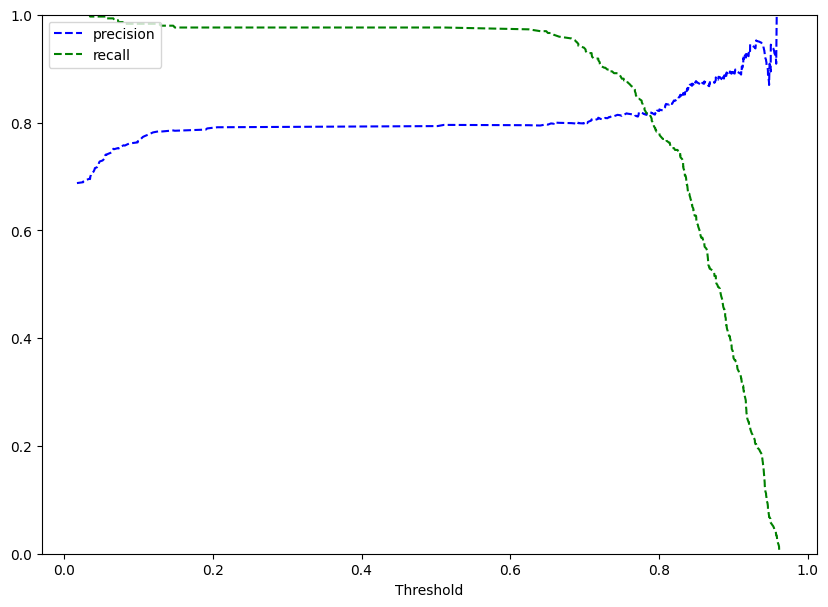

In [ ]:
y_scores_lda=lda.predict_proba(x_train_imputed) #predict_proba gives the probability of each observation belonging to each class


precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label='precision')
plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~0.82.

Performance at this threshold

              precision    recall  f1-score   support

           0       0.56      0.69      0.62       134
           1       0.84      0.75      0.79       295

    accuracy                           0.73       429
   macro avg       0.70      0.72      0.70       429
weighted avg       0.75      0.73      0.74       429



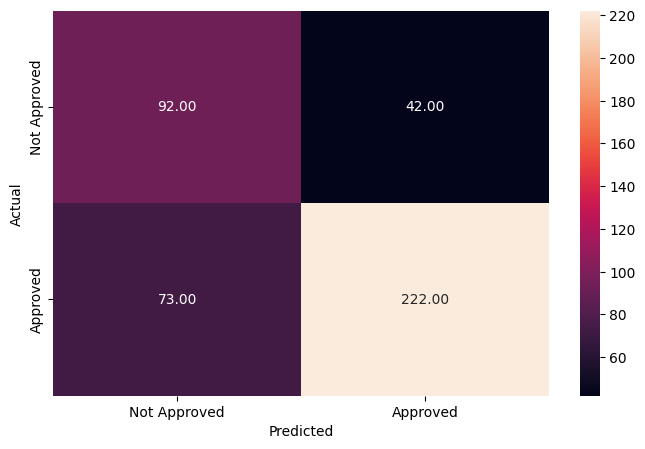

In [ ]:
optimal_threshold1=.82
y_pred_train_lda = lda.predict_proba(x_train_imputed)
metrics_score(y_train, y_pred_train_lda[:,1]>optimal_threshold1)

**Observations:**

Threshold-based Evaluation (Threshold: 0.82)

* Precision-Recall Balance: Precision for approved loans is higher but slightly lower for rejected loans. The model shows better recall for rejected loans compared to approved ones.

* Threshold Impact: Raising the threshold improves precision for rejected loans but lowers overall recall. Precision for approved loans slightly decreases with a higher threshold.

* Accuracy Overview: Overall accuracy stands at 73%, maintaining a balance between predicting both approved and rejected loans.

              precision    recall  f1-score   support

           0       0.49      0.64      0.55        58
           1       0.81      0.69      0.75       127

    accuracy                           0.68       185
   macro avg       0.65      0.67      0.65       185
weighted avg       0.71      0.68      0.69       185



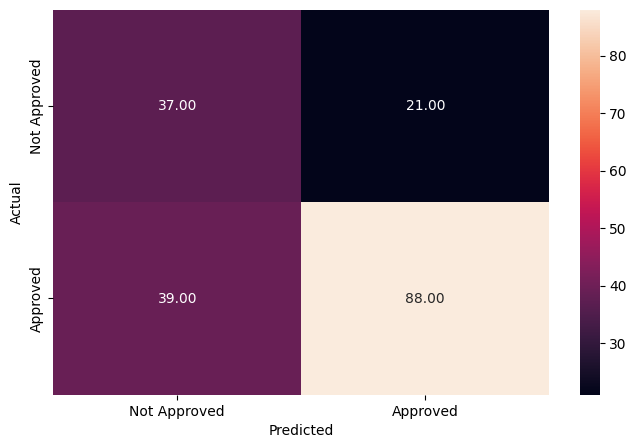

In [ ]:
optimal_threshold1=.82
y_pred_test_lda = lda.predict_proba(x_test_imputed)
metrics_score(y_test, y_pred_test_lda[:,1]>optimal_threshold1)

**Observations:**

Test Data Evaluation (Threshold: 0.82)

* Precision & Recall Balance: Precision for approved loans is higher, but slightly lower for rejected loans.
Better recall for rejected loans compared to approved ones.

* Threshold Impact: Similar to training, adjusting the threshold affects precision and recall trade-off.

* Overall Accuracy: Maintains a moderate accuracy of 68%, balancing predictions for both approved and rejected loans.

### Quadratic Discriminant Analysis

In [ ]:
#fitting qda model
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_imputed, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.82      0.47      0.60       134
           1       0.80      0.95      0.87       295

    accuracy                           0.80       429
   macro avg       0.81      0.71      0.73       429
weighted avg       0.80      0.80      0.78       429



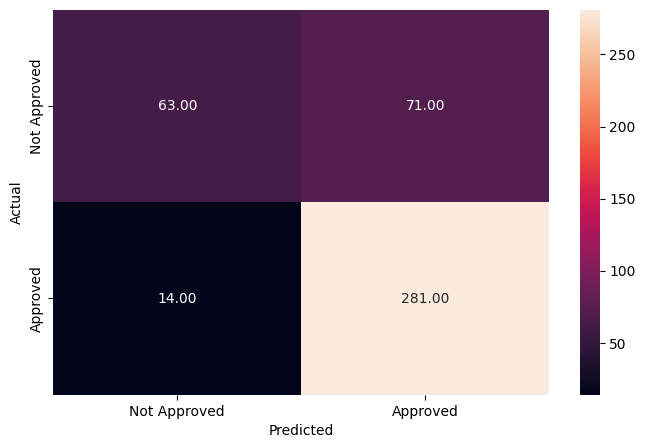

In [ ]:
#checking model performance on the training data
y_pred_train_qda = qda.predict(x_train_imputed)
metrics_score(y_train, y_pred_train_qda)

              precision    recall  f1-score   support

           0       0.87      0.47      0.61        58
           1       0.80      0.97      0.88       127

    accuracy                           0.81       185
   macro avg       0.83      0.72      0.74       185
weighted avg       0.82      0.81      0.79       185



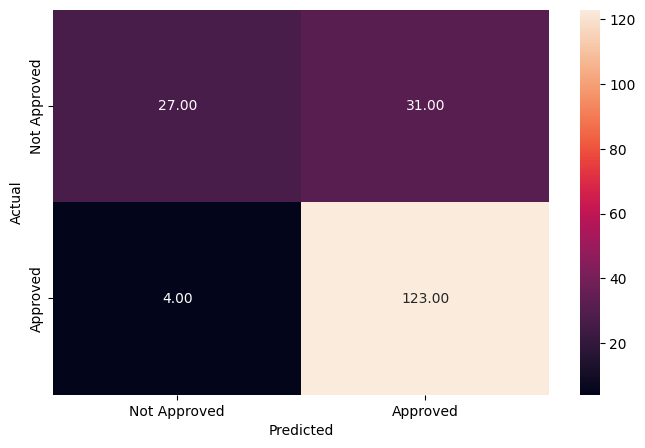

In [ ]:
#checking performance of the model on the test data
y_pred_test_qda = qda.predict(x_test_imputed)
metrics_score(y_test, y_pred_test_qda)

**Observations:**

Training Set Performance:

* Class 0 (No condition): The model struggles with precision (0.82) and recall (0.47), indicating it misclassifies many instances without the condition.
* Class 1 (With condition): The model performs well with high precision (0.80) and recall (0.95), accurately identifying most instances with the condition.

Test Set Performance:

* Class 0 (No condition): Similar to the training set, precision (0.87) and recall (0.47) for class 0 remain imbalanced, indicating difficulty in correctly identifying non-condition cases.
* Class 1 (With condition): The model maintains good performance, with high precision (0.80) and recall (0.97), effectively identifying instances with the condition.

Overall Observations:

* The model generalizes well from training to the test set, showing consistency in performance.
* However, there's a noticeable struggle in correctly identifying instances without the condition (class 0) in both sets, as evidenced by the lower recall and precision.
* Addressing the imbalance and improving the model's ability to accurately predict instances without the condition could significantly enhance its overall effectiveness.

Finally, we have decided not to take the threshold into considerations since the accuracy has been negatively impacted compared to the original results.

# Random Forest Classifier

Importing the classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Fitting the data

In [ ]:
clf  = RandomForestClassifier()
clf = clf.fit(x_train_imputed, y_train)

#### Checking Model Performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       295

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



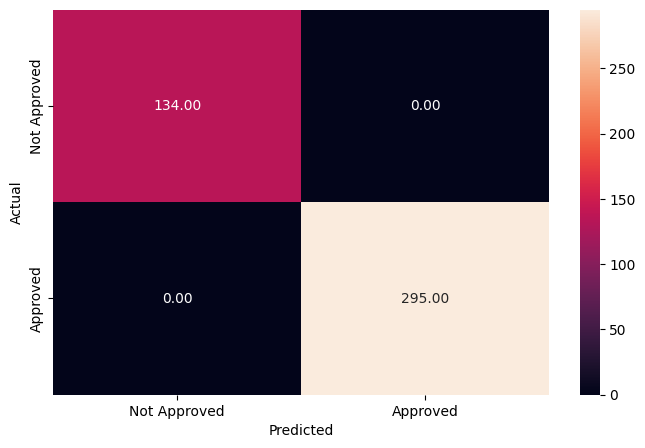

In [ ]:
predi = clf.predict(x_train_imputed)
metrics_score(y_train, predi)

              precision    recall  f1-score   support

           0       0.47      0.77      0.58        35
           1       0.94      0.79      0.86       150

    accuracy                           0.79       185
   macro avg       0.70      0.78      0.72       185
weighted avg       0.85      0.79      0.81       185



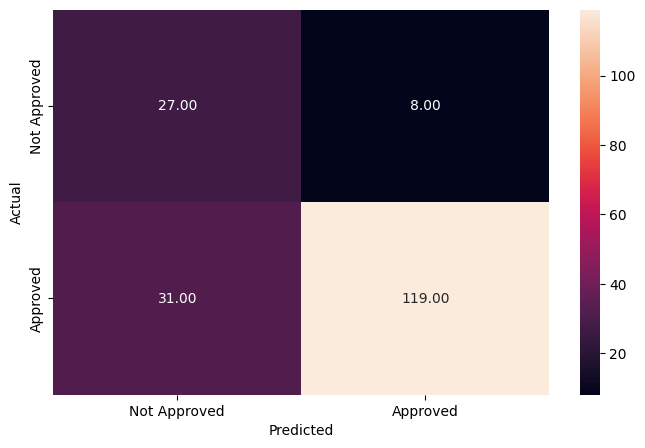

In [ ]:
pred = clf.predict(x_test_imputed)
metrics_score(pred, y_test)

In [ ]:
params_knn={'criterion' :['gini', 'entropy', 'log_loss'],'max_features' : ['sqrt', 'log2']}

grid_clf=GridSearchCV(estimator=clf,param_grid=params_knn,scoring='recall',cv=10)

model_clf=grid_clf.fit(x_train_imputed,y_train)

clf = model_clf.best_estimator_
print(clf)

RandomForestClassifier(criterion='log_loss', max_features='log2')


In [ ]:
clf.fit(x_train_imputed, y_train)

RandomForestClassifier(criterion='log_loss', max_features='log2')

              precision    recall  f1-score   support

           0       0.87      0.47      0.61        58
           1       0.80      0.97      0.88       127

    accuracy                           0.81       185
   macro avg       0.83      0.72      0.74       185
weighted avg       0.82      0.81      0.79       185



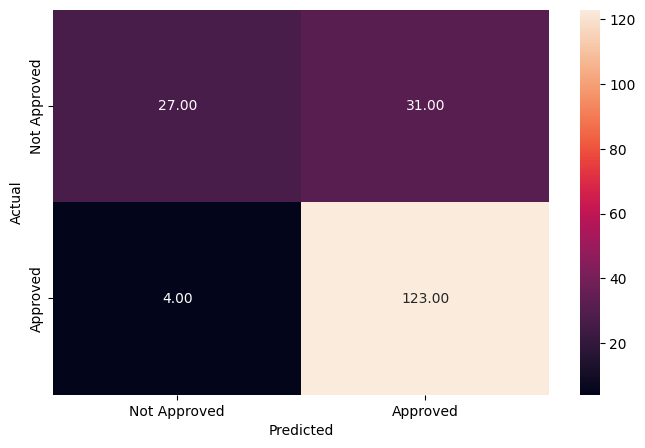

In [ ]:
pred = clf.predict(x_test_imputed)
metrics_score(y_test, pred)

**Observations:**

Training Set Performance:
* Perfect Predictions: Exceptional performance on the training set, achieving flawless precision and recall for both classes.
* High Accuracy: Attained 100% accuracy, indicating an excellent fit to the training data.
* Robust Classification: Both classes were identified perfectly, demonstrating high model competency.

Test Set Performance:
* Decent Accuracy: Achieved 81% accuracy on the test set, showcasing general effectiveness in predictions.
* Improved for Class 1: Higher precision and recall for approved loans (Class 1), highlighting better identification.
* Class Imbalance Impact: Class 0 (not approved) showed slightly lower precision and recall, indicating challenges in correctly identifying this class.


Feature Importance

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': clf.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
4,Credit_History,0.209501
0,ApplicantIncome,0.198092
2,LoanAmount,0.192435
1,CoapplicantIncome,0.124206
3,Loan_Amount_Term,0.050980
12,Property_Area_Semiurban,0.034589
10,Education_Not Graduate,0.027880
13,Property_Area_Urban,0.027777
6,Married_Yes,0.025640
5,Gender_Male,0.025275


**Observations:**

* The model seems to have considered all the variables as important determinicstic criteria.
* It has particularly categorized Credit_history, ApplicantIncome and CoapplicantIncome as equally impotant while making the decision.
* It has however, not neglected the other variables while making the decision which shows that the model has a more realistic approach.

### Final Observations

Analyzing the model performances and considering the objectives of maximizing both precision and recall, the **Random Forest** model seems to perform relatively better compared to other models. Logistic regression had similar accuracy but its feature importance scores were not diverse enough. So Random forest seems to be the superior model.

Random Forest Observations:

Strengths:
* Exceptional Training Performance: Achieved flawless precision and recall on the training set, signifying a robust understanding of patterns within the data.
* High Accuracy: Demonstrated 100% accuracy on the training data, showcasing an excellent fit and understanding of training patterns.
* Balanced Predictions for Class 1: Maintained high precision and recall for approved loans, reflecting accurate identification of these instances.

Weaknesses:
* Imbalance in Class Prediction: Class 0 (not approved) showed lower precision and recall on the test set, implying challenges in accurately identifying rejected loan applications.
* Test Set Performance Gap: Despite strong training performance, there was a drop in precision and recall on unseen test data, indicating possible overfitting or limitations in generalizing to new instances.
* Potential Overfitting: The stark contrast between training and test set performances suggests the model might be overfitting the training data.

Overall Assessment:
This model stands out for its exceptional performance on the training data, showcasing a deep understanding of the patterns within it. However, it sometimes exhibits limitations in accurately predicting rejected loan applications on unseen test data, indicating potential overfitting or limitations in generalizing to new instances. Further steps to address overfitting or enhance generalizability could maximize its effectiveness in real-world scenarios.


## Recommendations

* Prioritize Key Factors: Focus on applicants with a good credit history and those having high income, considering their higher approval odds.

* Address Rejection Identification: Improve models to better identify applicants who shouldn't receive loans (Class 0) to mitigate risks.

* Continuous Improvement: Regularly assess and enhance models by exploring feature interactions and ensemble techniques.

* Compliance and Fair Practices: Ensure models comply with regulations and promote fair lending practices, avoiding biases and ensuring transparency.